Import tensorflow and other libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Get dataset again, containing images of daisies, dandelions, roses, sunflowers, tulips.

In [34]:
# set random seed
tf.random.set_seed(122)

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

## load data as a keras dataset

In [35]:
# set batch size and image size
batch_size = 32
img_height = 180
img_width = 180

# load data set
# training split
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# validation split
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

# configure for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [36]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Flatten(),
  layers.Dense(8, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 flatten_6 (Flatten)         (None, 97200)             0         
                                                                 
 dense_12 (Dense)            (None, 8)                 777608    
                                                                 
 dense_13 (Dense)            (None, 5)                 45        
                                                                 
Total params: 777,653
Trainable params: 777,653
Non-trainable params: 0
_________________________________________________________________


In [39]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 1s 11ms/step - loss: 1.6000 - accuracy: 0.2459 - val_loss: 1.6019 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 1s 10ms/step - loss: 1.5999 - accuracy: 0.2459 - val_loss: 1.6018 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 1s 9ms/step - loss: 1.5999 - accuracy: 0.2459 - val_loss: 1.6019 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 1s 11ms/step - loss: 1.5999 - accuracy: 0.2459 - val_loss: 1.6019 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 1s 9ms/step - loss: 1.6000 - accuracy: 0.2459 - val_loss: 1.6020 - val_accuracy: 0.2398
Epoch 6/10
92/92 [==============================] - 1s 9ms/step - loss: 1.6000 - accuracy: 0.2459 - val_loss: 1.6020 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 1s 10ms/step - loss: 1.5999 - accuracy: 0.2459 - val_loss: 1.6020 - val_accuracy: 0.2398
Epoch 8/10
92/92

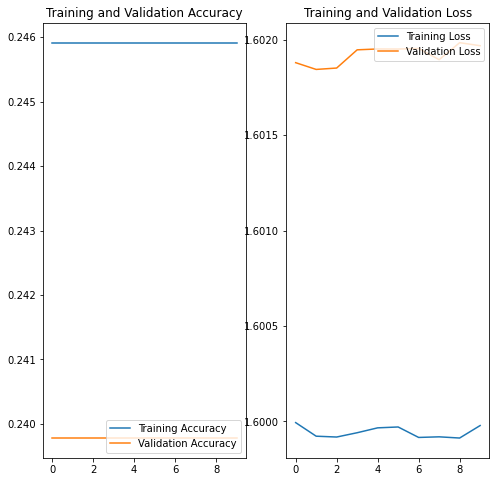

In [40]:
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
plot_results(history)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 flatten_8 (Flatten)         (None, 97200)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               12441728  
                                                                 
 dense_17 (Dense)            (None, 5)                 645       
                                                                 
Total params: 12,442,373
Trainable params: 12,442,373
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
92/92 [==============================] - 6s 57ms/step - loss: 8.5781 - accuracy: 0.3212 - val_loss: 2.3094 - val_accuracy: 0.3651
Epoch 2/10
92/92 [===============

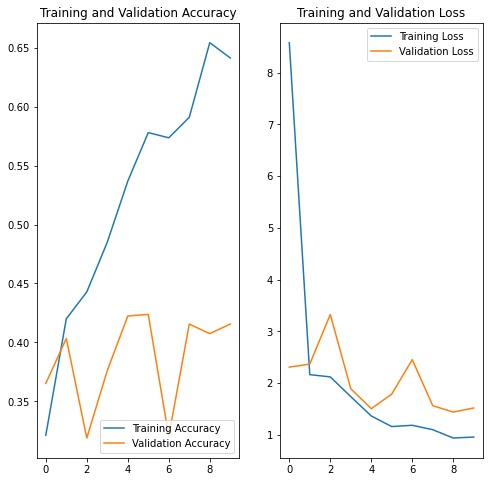

In [42]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

plot_results(history)

## Convolutional layer

In [46]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 129600)            0         
                                                                 
 dense_20 (Dense)            (None, 128)               16588928  
                                                                 
 dense_21 (Dense)            (None, 5)                 645       
                                                     

In [47]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 21s 222ms/step - loss: 2.5335 - accuracy: 0.4009 - val_loss: 1.1724 - val_accuracy: 0.4891
Epoch 2/10
92/92 [==============================] - 18s 200ms/step - loss: 0.9558 - accuracy: 0.6294 - val_loss: 1.0360 - val_accuracy: 0.5804
Epoch 3/10
92/92 [==============================] - 19s 202ms/step - loss: 0.6475 - accuracy: 0.7796 - val_loss: 1.0690 - val_accuracy: 0.5954
Epoch 4/10
92/92 [==============================] - 18s 199ms/step - loss: 0.4183 - accuracy: 0.8757 - val_loss: 1.0415 - val_accuracy: 0.6158
Epoch 5/10
92/92 [==============================] - 19s 206ms/step - loss: 0.2528 - accuracy: 0.9332 - val_loss: 1.1832 - val_accuracy: 0.5954
Epoch 6/10
92/92 [==============================] - 19s 207ms/step - loss: 0.1517 - accuracy: 0.9717 - val_loss: 1.0941 - val_accuracy: 0.6185
Epoch 7/10
92/92 [==============================] - 18s 201ms/step - loss: 0.0881 - accuracy: 0.9867 - val_loss: 1.3128 - val_accuracy: 0.5954

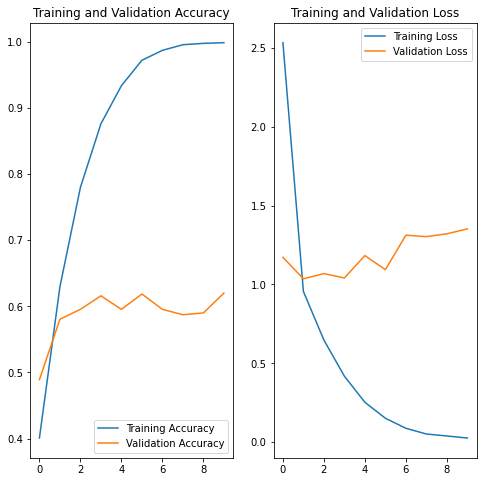

In [48]:
plot_results(history)

## Adding more layers

In [49]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 64)      

Fit same model as last time. 

In [50]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 28s 298ms/step - loss: 1.3692 - accuracy: 0.4210 - val_loss: 1.1856 - val_accuracy: 0.4918
Epoch 2/10
92/92 [==============================] - 27s 297ms/step - loss: 0.9838 - accuracy: 0.6216 - val_loss: 0.9754 - val_accuracy: 0.6226
Epoch 3/10
92/92 [==============================] - 28s 308ms/step - loss: 0.7918 - accuracy: 0.6975 - val_loss: 0.9404 - val_accuracy: 0.6403
Epoch 4/10
92/92 [==============================] - 28s 301ms/step - loss: 0.5986 - accuracy: 0.7929 - val_loss: 0.9768 - val_accuracy: 0.6417
Epoch 5/10
92/92 [==============================] - 28s 302ms/step - loss: 0.3695 - accuracy: 0.8713 - val_loss: 1.1976 - val_accuracy: 0.6199
Epoch 6/10
92/92 [==============================] - 28s 305ms/step - loss: 0.2372 - accuracy: 0.9244 - val_loss: 1.2905 - val_accuracy: 0.6281
Epoch 7/10
92/92 [==============================] - 28s 306ms/step - loss: 0.1372 - accuracy: 0.9557 - val_loss: 1.4856 - val_accuracy: 0.6267

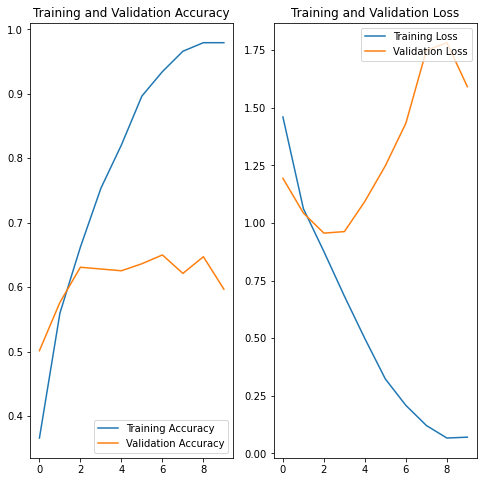

In [20]:
plot_results(history)

## data augmentation
Making random transformations to data to generate more training data. Makes the model generalize better.

In [51]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

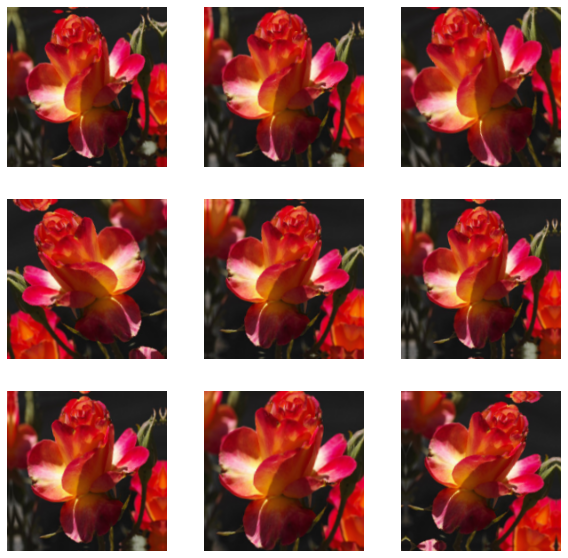

In [52]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [53]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [54]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 37s 376ms/step - loss: 1.2987 - accuracy: 0.4441 - val_loss: 1.1040 - val_accuracy: 0.5191
Epoch 2/10
92/92 [==============================] - 34s 373ms/step - loss: 1.0283 - accuracy: 0.6018 - val_loss: 1.0067 - val_accuracy: 0.6131
Epoch 3/10
92/92 [==============================] - 34s 374ms/step - loss: 0.9194 - accuracy: 0.6356 - val_loss: 0.8846 - val_accuracy: 0.6485
Epoch 4/10
92/92 [==============================] - 34s 376ms/step - loss: 0.8421 - accuracy: 0.6751 - val_loss: 0.8644 - val_accuracy: 0.6499
Epoch 5/10
92/92 [==============================] - 34s 373ms/step - loss: 0.7787 - accuracy: 0.6993 - val_loss: 0.8417 - val_accuracy: 0.6894
Epoch 6/10
92/92 [==============================] - 35s 377ms/step - loss: 0.7236 - accuracy: 0.7183 - val_loss: 0.7912 - val_accuracy: 0.6866
Epoch 7/10
92/92 [==============================] - 34s 373ms/step - loss: 0.6805 - accuracy: 0.7357 - val_loss: 0.8271 - val_accuracy: 0.6812

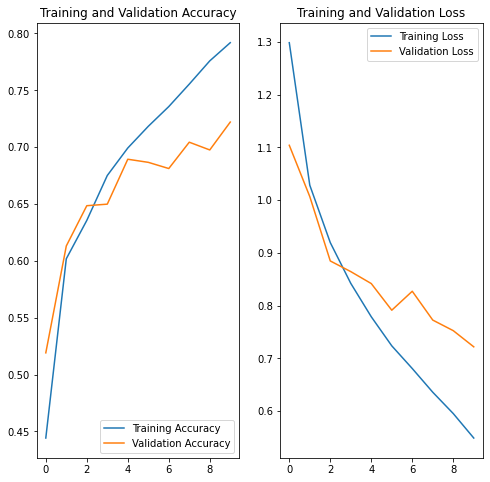

In [55]:
plot_results(history)

## dropout
Adds in a dropout layer. Here we remove 20% of the inputs from the previous layer.

In [56]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [57]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 38s 385ms/step - loss: 1.2843 - accuracy: 0.4530 - val_loss: 1.4082 - val_accuracy: 0.4850
Epoch 2/15
92/92 [==============================] - 35s 383ms/step - loss: 1.0573 - accuracy: 0.5834 - val_loss: 1.0272 - val_accuracy: 0.6104
Epoch 3/15
92/92 [==============================] - 35s 384ms/step - loss: 0.9241 - accuracy: 0.6359 - val_loss: 1.0040 - val_accuracy: 0.6158
Epoch 4/15
92/92 [==============================] - 35s 382ms/step - loss: 0.8695 - accuracy: 0.6689 - val_loss: 0.9830 - val_accuracy: 0.6376
Epoch 5/15
92/92 [==============================] - 35s 382ms/step - loss: 0.8133 - accuracy: 0.6863 - val_loss: 0.8643 - val_accuracy: 0.6771
Epoch 6/15
92/92 [==============================] - 35s 384ms/step - loss: 0.7357 - accuracy: 0.7187 - val_loss: 0.9044 - val_accuracy: 0.6771
Epoch 7/15
92/92 [==============================] - 35s 383ms/step - loss: 0.7022 - accuracy: 0.7381 - val_loss: 0.8654 - val_accuracy: 0.6771

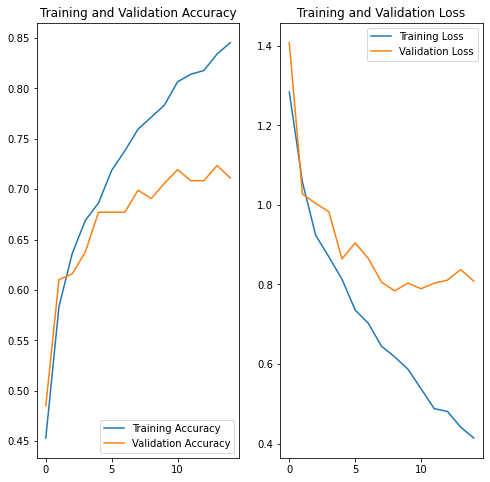

In [58]:
plot_results(history)